# Data Analysis of Pew Research Center's Teen Dating Survey 

* This notebook analyzes data in order to answer questions relevant to our final project. 

* Link to data: https://www.pewresearch.org/internet/dataset/september-2014-march-2015-teens/ 
    From 9/25/14 to 10/9/14 and from 2/10/15 to 3/6/15 Pew Research Center collected data from more than 1600 parents and children asking them a wide variety of questions revolving around technology, social media, dating, and friendships. The dataset also contains demographic information from the respondents.



In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt

## Question 1: What methods of breaking up do teenagers find acceptable?

### Steps:
* Import cleaned data frame
* Plot responses to relevant survey questions

### Code:

In [2]:
# This dataframe includes the detailed responses to survey questions and detailed demographic information. 
dating_df = pd.read_csv('../data/Clean Data/Joy_Clean_Teen_Dating_Short.csv')

##### The following plots show the distribution of responses for different questions.

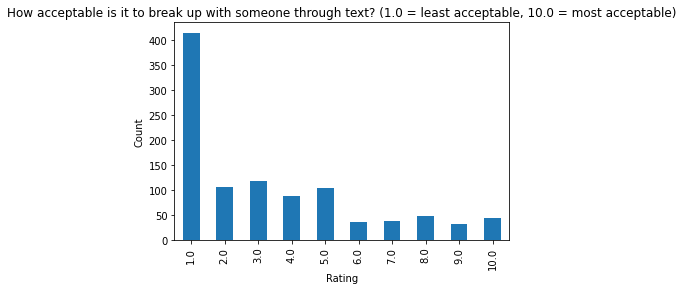

In [3]:
# Some of the responses to the question are coded as a negative number. I am ignoring those rows. 
neg_rf = dating_df[['accbu_text', 'accbu_inperson', 'accbu_phone', 'accbu_sm','accbu_friend', 'accbu_smstatus']] == -1.0

accbu_text_rep = dating_df[-neg_rf]['accbu_text'].value_counts()

# Plot
accbu_text_rep.sort_index().plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through text? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

#### The vast majority of teenagers find breaking up through text very unacceptable. 

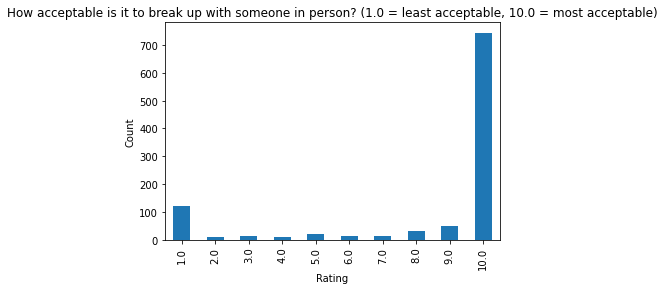

In [4]:
accbu_inperson_rep = dating_df[-neg_rf]['accbu_inperson'].value_counts().sort_index()
accbu_inperson_rep.plot(kind='bar')
plt.title('How acceptable is it to break up with someone in person? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');


##### The vast majority of teenagers find breaking up in person very acceptable. 

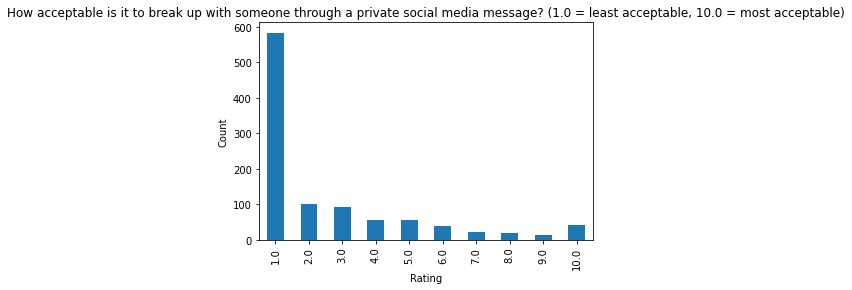

In [5]:
accbu_sm_rep = dating_df[-neg_rf]['accbu_sm'].value_counts().sort_index()
accbu_sm_rep.plot(kind='bar')
plt.title('How acceptable is it to break up with someone through a private social media message? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');


##### The vast majority of teenagers find breaking up through private social media messages very unacceptable. 

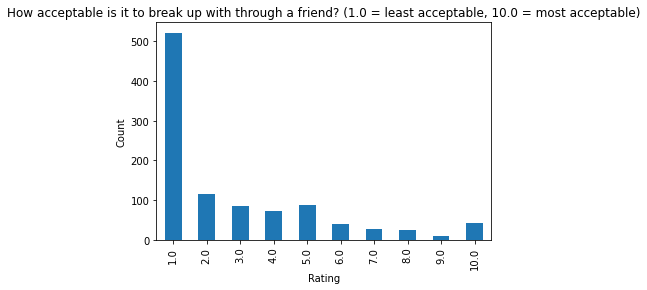

In [6]:
accbu_friend_rep = dating_df[-neg_rf]['accbu_friend'].value_counts().sort_index()
accbu_friend_rep.plot(kind='bar')
plt.title('How acceptable is it to break up with through a friend? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');


##### The vast majority of teenagers find breaking up with someone through a friend very unacceptable. 

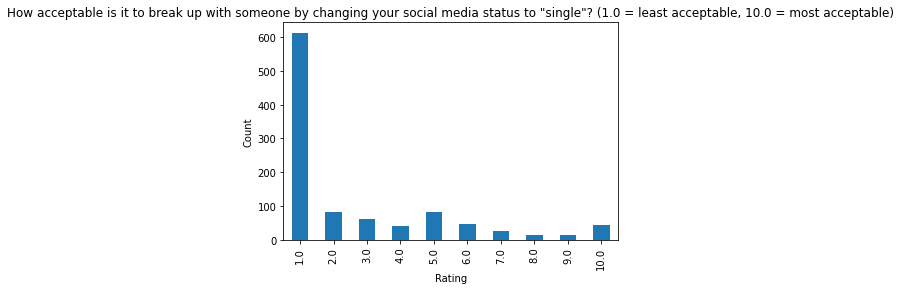

In [7]:
accbu_smstatus_rep = dating_df[-neg_rf]['accbu_smstatus'].value_counts().sort_index()
accbu_smstatus_rep.plot(kind='bar')
plt.title('How acceptable is it to break up with someone by changing your social media status to "single"? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

##### The vast majority of teenagers find breaking up with someone through changing your social media relationship status very unacceptable.

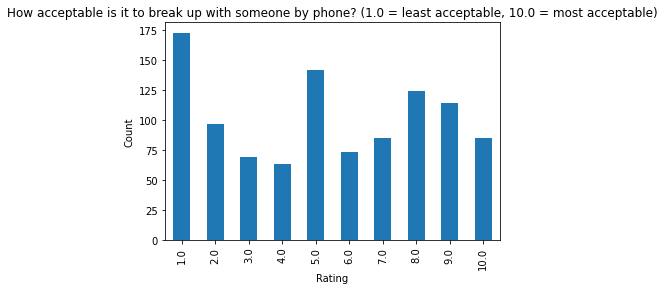

In [8]:
accbu_phone_rep = dating_df[-neg_rf]['accbu_phone'].value_counts().sort_index()
accbu_phone_rep.plot(kind='bar')
plt.title('How acceptable is it to break up with someone by phone? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

##### Compared to the other questions, there is much more variance in how teenagers feel about this method of breaking up. It is difficult to come to a clear conclusion by solely looking at this plot. By looking at the actual numbers for this question we can gain a more precise understanding on how teenagers feel about this breakup method.

In [9]:
dating_df[-neg_rf]['accbu_phone'].value_counts().sort_index()

1.0     173
2.0      97
3.0      69
4.0      63
5.0     142
6.0      73
7.0      85
8.0     124
9.0     114
10.0     85
Name: accbu_phone, dtype: int64

In [10]:
dating_df[-neg_rf]['accbu_phone'].describe()

count    1025.000000
mean        5.304390
std         3.023836
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: accbu_phone, dtype: float64

##### The top 3 numbers that teenagers chose was 1.0 (173), 5.0 (142), and 8.0 (124). The average ranking is 5.3 and the median is 5. If we group the rankings with 1-3 (339) meaning unacceptable, 4 - 6 (278) meaning neutral, and 7 - 10 (408) meaning acceptable. A plurality (40%) of teenagers find this method acceptable. 

##### Based on this addititional information, the best summary of this data is that teenagers don't have similar views on the acceptability of breaking up with someone through the phone. The average teenager is neutral, a plurality of teenagers find it acceptable, but a meaningful amount of teenagers find it very unacceptable. 

### Answer:
### The only break up method that a clear majority of teenagers find appropriate is breaking up with someone in-person. 

### Observation:
#### For all of the methods except for breaking up with someone by phone most of the teenagers gave a similar response. The second highest was also only one or two numbers away from the highest. For the most part, teenagers have similar views concerning what is acceptable and unacceptable. 

## Question 2: What methods do teenagers use to break up?

### Steps:
* Plot responses to relevant survey questions

### Code:

##### The following plots show the distribution of responses for different questions. 

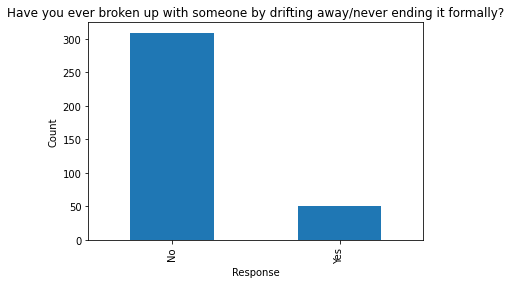

In [11]:
dating_df['bu_drift2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by drifting away/never ending it formally?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by drifting away/never ending it formally.

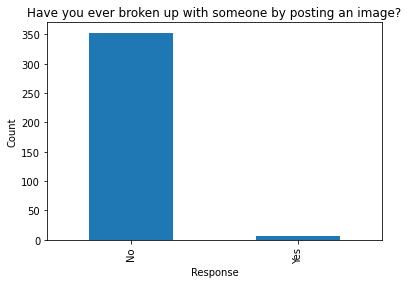

In [12]:
dating_df['bu_image2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by posting an image?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by posting an image. 

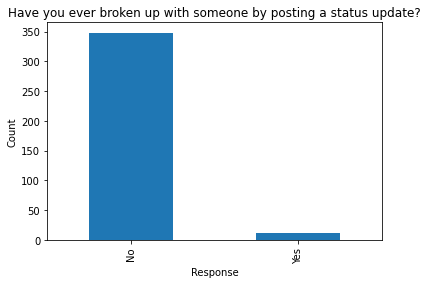

In [13]:
dating_df['bu_smstatus2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by posting a status update?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by posting a status update.

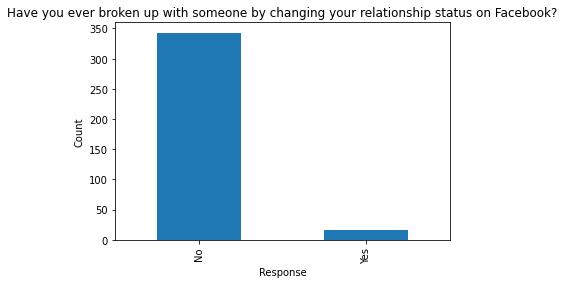

In [14]:
dating_df['bu_fbstatus2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by changing your relationship status on Facebook?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by changing their relationship status on Facebook.

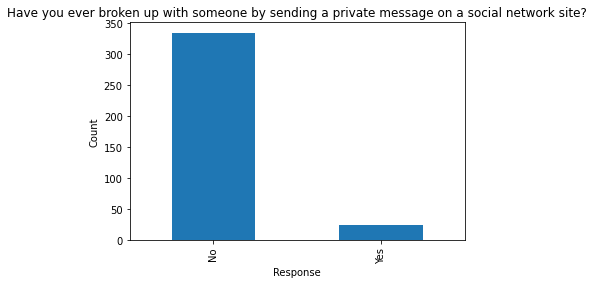

In [15]:
dating_df['bu_sm2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by sending a private message on a social network site?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by sending a private message on a social network site. 

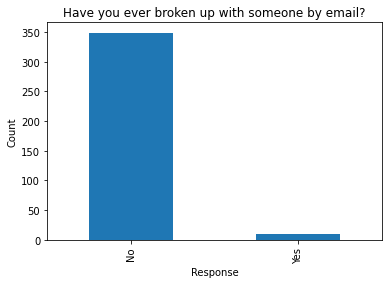

In [16]:
dating_df['bu_email2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by email?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers have not broken up with someone by email.

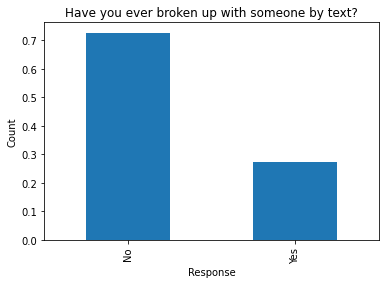

In [75]:
dating_df['bu_text2'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by text?')
plt.xlabel('Response')
plt.ylabel('Count');

##### A majority of teenagers have not broken up with someone by text.

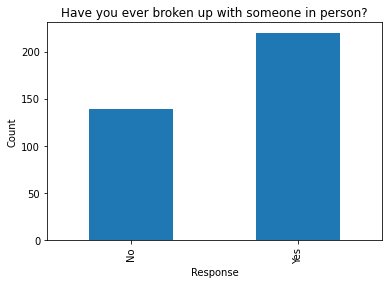

In [18]:
dating_df['bu_inperson2'].value_counts(ascending=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone in person?')
plt.xlabel('Response')
plt.ylabel('Count');

In [19]:
dating_df['bu_inperson2'].value_counts(normalize=True)

Yes    0.612813
No     0.387187
Name: bu_inperson2, dtype: float64

##### The majority of teenagers have broken up with someone in person.

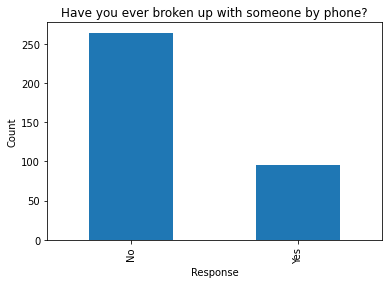

In [20]:
dating_df['bu_phone2'].value_counts().plot(kind = 'bar')
plt.title('Have you ever broken up with someone by phone?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The majority of teenagers have not broken up with someone by phone.

### Answer:

#### The only break up method that a majority of teenagers have used is breaking up in person (61%). Breaking up by text (27%) and breaking up with by phone (26%) had the second and third highest amount of teenagers who have used these methods before. 

### Observation:

#### Interestingly, the answer to question two corresponds with question one. The only breakup method that a majority of teenagers have used is also the only breakup up method that teenagers find clearly acceptable. 

## Question 3: Is there an association between teenagers who have been broken up with by text and whether they use unacceptable break up methods on other people?

###  I am interested in seeing if there is a relationship between being on the receiving end of an unacceptable break up method and using an unacceptable break up method with other people. I am only going to look at those who have been broken up with through text because it is the only break up method that more than 100 people in our sample have experienced. 


### Steps:
* Create row filter for teenagers who have been broken up by text
* Plot responses to relevant survey questions  

### Code:

##### The following plots show the distribution of responses for different questions 

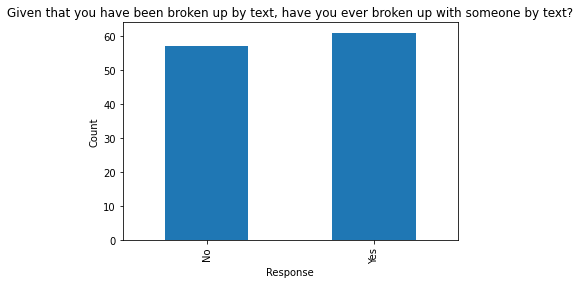

In [21]:
# This row filter selects for teenagers who have been broken up with by text
dump_text2_rf = dating_df['dump_text2'] == 'Yes'


dating_df[dump_text2_rf]['bu_text2'].value_counts(ascending=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by text?')
plt.xlabel('Response')
plt.ylabel('Count');

#### A slight majority of teenagers who have been broken up by text have also broken up with someone by text

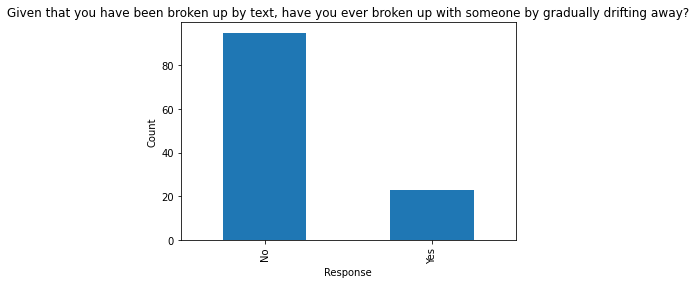

In [22]:
dating_df[dump_text2_rf]['bu_drift2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by gradually drifting away?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone else by drifting away. 

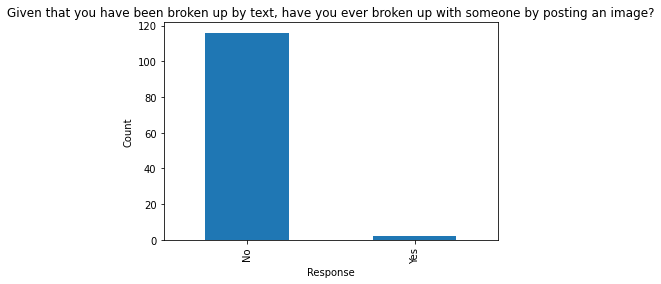

In [23]:
dating_df[dump_text2_rf]['bu_image2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by posting an image?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone by posting an image. 

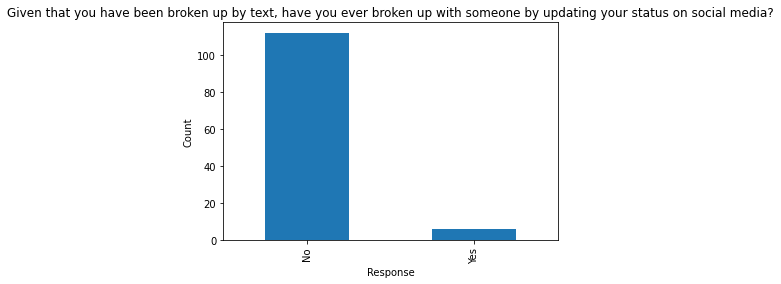

In [24]:
dating_df[dump_text2_rf]['bu_smstatus2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by updating your status on social media?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone by updating their status on social media.

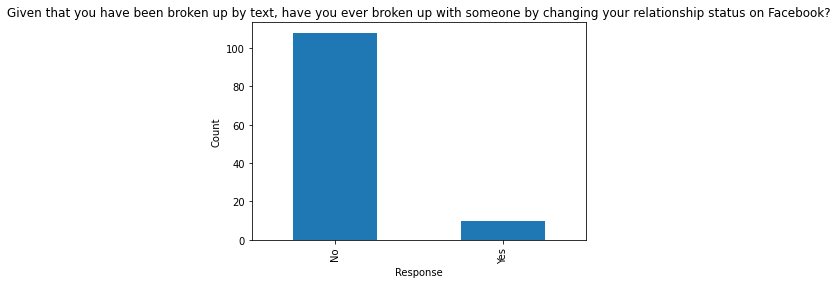

In [25]:
dating_df[dump_text2_rf]['bu_fbstatus2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by changing your relationship status on Facebook?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone by changing their relationships status on Facebook

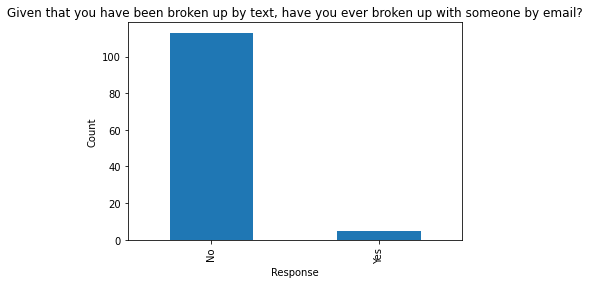

In [26]:
dating_df[dump_text2_rf]['bu_email2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by email?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone by email. 

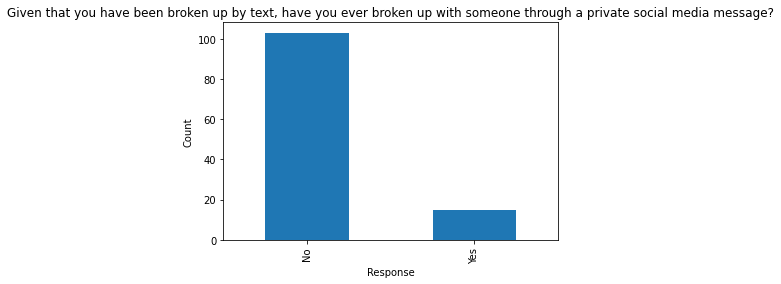

In [27]:
dating_df[dump_text2_rf]['bu_sm2'].value_counts().plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone through a private social media message?')
plt.xlabel('Response')
plt.ylabel('Count');

##### The vast majority of teenagers who have been broken up with by text have not broken up with someone through a private social media message.

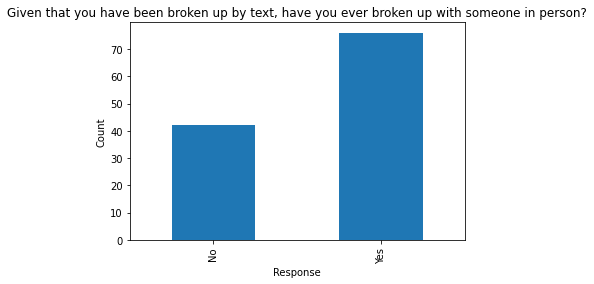

In [28]:
dating_df[dump_text2_rf]['bu_inperson2'].value_counts(ascending=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone in person?')
plt.xlabel('Response')
plt.ylabel('Count');

### Answer:

#### Of the teenagers who have been broken up with by text, the highest share of respondents still broke up with someone using the in-person method. The only unacceptable break up method that a majority of teenagers who have been broken up with by text have used is breaking up by text. All of the other break up methods had similar "yes" and "no" distributions compared to teenagers in general. 

### Observation: 
#### There is a clear increase in the share of teenagers that have broken up with someone by text when you solely look at those who have been broken up with by text. Although this method is generally seen as inappropriate, a majority of the teenagers who have been at the receiving end of this method have already used it on others. This relationship doesn't occur for the other inappropriate break up methods. 


## Question 4: Do teenagers who use unacceptable break up methods have different views on the acceptability of those methods?

### Steps:
* Create row filters for those who have used unacceptable break up methods
* Create tables showing responses for relevant survey questions 

##### As a reminder, the teenagers in our dataset found breaking up through text, a private social media message, a friend, or changing your social media relationship status very unacceptable. We only have data on the amount of teenagers in our sample who have broken up with someone else before by using text, a private social media message, or changing their social media relationship status. 

### Code:

In [35]:
#Row filters
bu_text2_rf = dating_df['bu_text2'] == 'Yes'
bu_sm2_rf = dating_df['bu_sm2'] == 'Yes'
bu_smstatus2_rf = dating_df['bu_smstatus2'] == 'Yes'


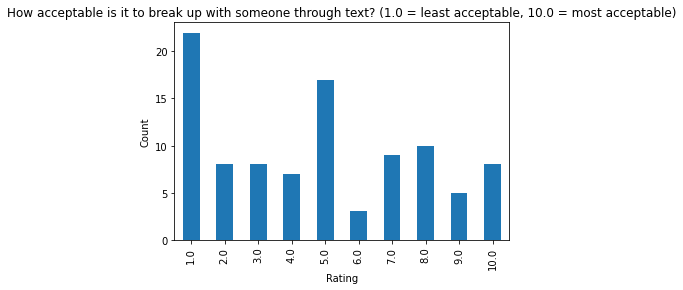

In [47]:
q4_text = dating_df[bu_text2_rf][-neg_rf]['accbu_text'].value_counts()
q4_text.sort_index().plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through text? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

##### Teenagers as a whole have a more consistent view on the acceptability of breaking up with someone over text. There is much more variance among those who have used this method on another person. However, a plurality still find it very unacceptable. 

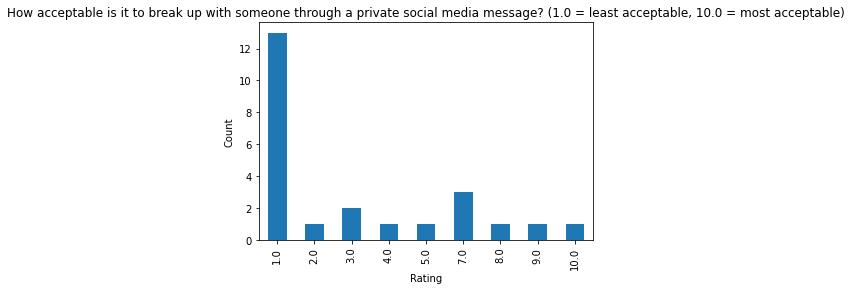

In [48]:
q4_sm = dating_df[bu_sm2_rf][-neg_rf]['accbu_sm'].value_counts()
q4_sm.sort_index().plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through a private social media message? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

##### Teenagers who have used this method still find it very unacceptable 

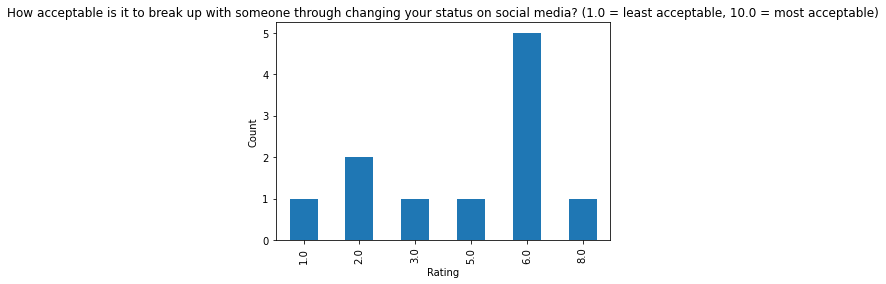

In [49]:
q4_smstatus = dating_df[bu_smstatus2_rf][-neg_rf]['accbu_smstatus'].value_counts()
q4_smstatus.sort_index().plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through changing your status on social media? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating');

##### There is a clear difference in acceptability among those who have used this method. However, very few teenagers in our sample have used this method. 

### Answer: Teenagers who have broken up with someone else through a private social media message share similar views to teenagers in general. They find this method very unacceptable. However, the other "unacceptable" break up methods are viewed more favorably by those who have used them in the past. 

### Observation: There are not that many people in the sample who have used the unacceptable break-up methods. Breaking up through changing your social media status had the biggest difference in acceptability ratings but it also only takes into account the opinions of 11 teenagers. 

## Question 5: Do teenagers still consider breaking up in person the most appropriate breakup method when we look at different demographic categories?

### Steps: 
* Use .groupby() to break up different demographic categories 
* Plot responses to relevant survey questions 

### Code:

In [69]:
gen_group = dating_df.groupby('Child_Gen2')
trans_group = dating_df.groupby('Transgender2')
sexuality_group = dating_df.groupby('Sexuality2')
age_group = dating_df.groupby('Child_Age')


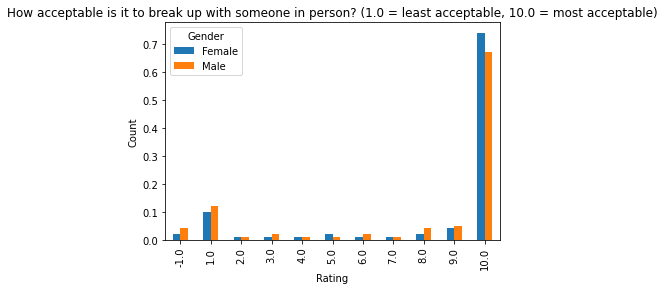

In [70]:
# The following graphs include information for -1. For whatever reason, when I tried to use "-neg_rf" similar to how I used it
# earlier in this notebook my code didn't work. 
accbu_inperson_by_gender = gen_group['accbu_inperson'].value_counts(normalize=True).unstack(level=0).round(2)
accbu_inperson_by_gender.plot(kind='bar')
plt.title('How acceptable is it to break up with someone in person? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(title = 'Gender');

##### There isn't that much difference in views between males and females.

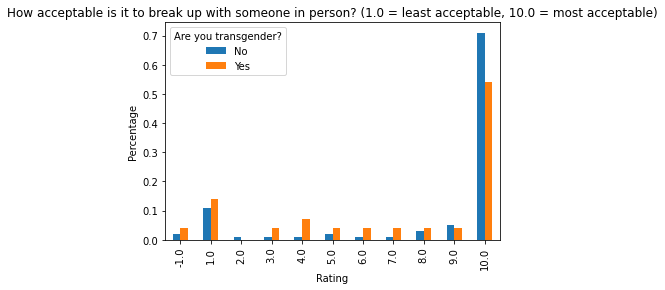

In [72]:
accbu_inperson_by_trans = trans_group['accbu_inperson'].value_counts(normalize=True).unstack(level=0).round(2)
accbu_inperson_by_trans.plot(kind='bar')
plt.title('How acceptable is it to break up with someone in person? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Percentage')
plt.xlabel('Rating')
plt.legend(title = 'Are you transgender?');

##### A higher share of cisgender teenagers view breaking up in person as the most acceptable option. However, a majority of trangender teenagers still view it as the most acceptable break up method. 

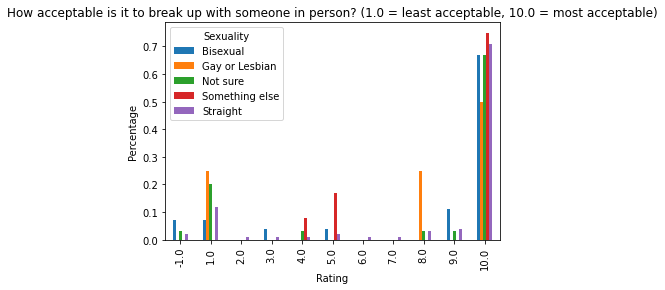

In [73]:
accbu_inperson_by_sexuality = sexuality_group['accbu_inperson'].value_counts(normalize=True).unstack(level=0).round(2)
accbu_inperson_by_sexuality.plot(kind='bar')
plt.title('How acceptable is it to break up with someone in person? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Percentage')
plt.xlabel('Rating')
plt.legend(title = 'Sexuality');

##### Gay and lesbian teenagers had the lowest share of people who view breaking up in person as the most acceptable method. About 1/2 of this group rated this option at either a 1 or 8. 

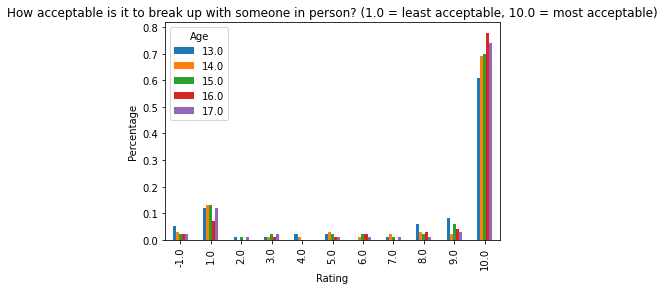

In [74]:
accbu_inperson_by_age = age_group['accbu_inperson'].value_counts(normalize=True).unstack(level=0).round(2)
accbu_inperson_by_age.plot(kind='bar')
plt.title('How acceptable is it to break up with someone in person? (1.0 = least acceptable, 10.0 = most acceptable)')
plt.ylabel('Percentage')
plt.xlabel('Rating')
plt.legend(title = 'Age');

##### Teenagers of different ages have pretty similar views. 

### Answer: Teenagers still consider breaking-up in person the most acceptable break-up method when you look at different demographic categories. The only demographic categories that seems to not value breaking up in person as much is gay, lesbian and transgender teenagers. Only a slight majority of teenagers in this group view breaking up in person as the most acceptable method. 

### Observation:

### Very small percentages of our sample identify as transgender, gay, and/or lesbian. It is possible that the number of teenagers who view breaking up in person as the most acceptable method could increase if a new survey had a higher amount of individuals within those demographic categories. 